In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as st

## "All of Statistics: A Concise Course in Statistical Inference" 

### Chapter 1: Probability

**Problem 21** Toss a coin a 1000 times. Plot proportion of heads to tails throughout the experiment.

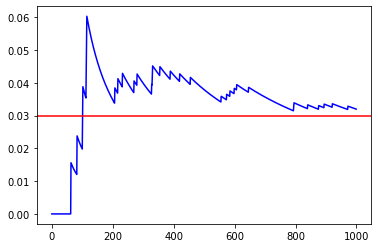

In [2]:
p = .03
N = 1000

# coinflips = [0 if random.random()<.5 else 1 for k in range(N)]

heads_total = 0
heads_proportions = []

for k in range(N):
    if random.random() < p: heads_total +=1
    heads_proportions.append(heads_total/(k+1))

plt.plot(heads_proportions, 'b')
plt.axhline(y = p, color='r');

**Note:** I'm using `random.random` to do it "from scratch" but I could also have used `random.randint(0,1)` to simulate coin toss.

**Problem 22** Flip coin n times with probability of heads p. Let X be the number of heads. Simulate X repeatedly, average the results and compare the average of the X's to np. Try this for p = .3 and N = 10, 100, 1000.

In [3]:
def coinflipper(N,p):
    heads_total = 0
    for k in range(N):
        if random.random() < p: heads_total +=1
    return heads_total

p = .3
N = 1000
number_simulations = 1000

avg = sum(coinflipper(N,p) for k in range(number_simulations)) / number_simulations

print(f'average heads = {avg}')
print(f'N*p = {N*p}')
print(f'p = {p}')
print(f'N = {N}')

average heads = 300.122
N*p = 300.0
p = 0.3
N = 1000


**Exercise 23** Consider tossing a fair die. Let A = {2, 4, 6}  and B = {1, 2, 3, 4}. Simulate draws from the sample space and verify that $\hat P(AB) = \hat P(A) \hat P(B)$. Compute $\hat P(AB)$, $\hat P(A)$ and $\hat P(B)$ and compare them to their theoretical values.

In [4]:
faces = list(range(1,7))

A = {2,4,6}
B = {1,2,3,4}
AB = set.intersection(A,B)

number_simulations = 100

def die_simulator(event, faces=list(range(1,7)), number_simulations=100):
    ''' Takes in a set of equiprobable outcomes, a subset thereof and number of simulations.
    It then outputs the percentage of draws out of the 'faces' set that came from the
    'event' subset.'''
    count = 0
    for k in range(number_simulations):
        if random.choice(faces) in event: count +=1
    return count/number_simulations

print('A =', A, '  B = ', B, '  AB =', AB)
print('simulated P(A) =', die_simulator(A, number_simulations = 100))
print('actual P(A) =', len(A)/len(faces))
print('simulated P(B) =', die_simulator(B, number_simulations = 100))
print('actual P(B) =', len(B)/len(faces))
print('simulated P(AB) =', die_simulator(AB, number_simulations = 100))
print('actual P(AB) =', len(AB)/len(faces))

A = {2, 4, 6}   B =  {1, 2, 3, 4}   AB = {2, 4}
simulated P(A) = 0.5
actual P(A) = 0.5
simulated P(B) = 0.65
actual P(B) = 0.6666666666666666
simulated P(AB) = 0.28
actual P(AB) = 0.3333333333333333


**Note:** I'm using `random.random` to do it "from stratch" but I could also have used `random.randint(1,6)` to simulate the die.

### Chapter 2 : Random variables

**Problem 13** Let $X \sim N(0,1)$. Find the PDF and plot it. Generate a vector $x$ consisting of $10,000$ random variates $x_i$ of X. Let $y$ be a vector with entries $y_i = e^{x_i}$. Draw a histogram of $y$ and compare it to the PDF you found.

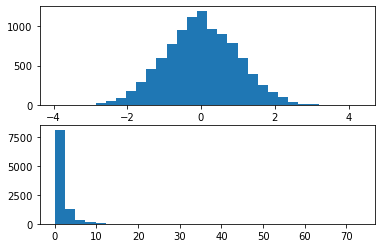

In [5]:
N = 10_000
x =[]
y = []

for k in range(N):
    number = random.normalvariate(0,1)
    x.append(number)
    # y.append(number**2)
    y.append(math.exp(number))

n_bins = 30
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x, n_bins)
ax2.hist(y, n_bins);

**Problem 15** Let $U \sim \rm{Uniform}(0,1)$ and $X = F^{-1}(U)$. Show that $X\sim F$. Now write a program that takes $\rm{Uniform}(0,1)$ random variables and generates random variables from an $\rm{Exponential}(\beta)$ distribution.

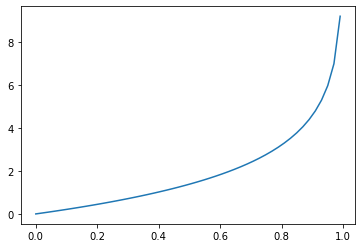

In [6]:
def exp_inverse(beta):
    def f(y):
        return - math.log(1-y)/beta
    return np.vectorize(f)

def exp_pdf(beta):
    def f(x):
        return beta*math.exp(-beta*x)
    return np.vectorize(f)

beta = 0.5
Finv = exp_inverse(beta)
f = exp_pdf(beta)


x = np.linspace(0,0.99,50)
plt.plot(x, Finv(x));


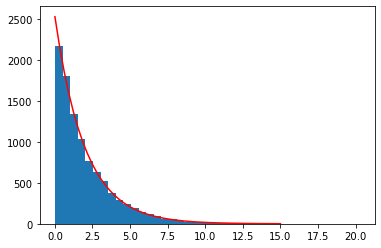

In [7]:
def X(Finv, n):
    """Take the inverse Finv of the CDF and n and return n samples from X ~ F"""
    uniform = np.random.rand(n)
    return Finv(uniform)

values, bins, _ = plt.hist(X(Finv, 10000), 40)
area = np.sum(np.diff(bins)*values)
x = np.linspace(0,15,50)
plt.plot(x, area*f(x), 'r');

### Chapter 3: Expectation

**Problem 9** Let $X_1,\dots,X_n ~ N(0,1)$ independent and let $\bar X_n =  1/n \sum_{i=1}^n X_i$. Plot $\bar X_n$ versus $n$ for $n=1,\dots,10,000$. Repeat for Cauchy instead of the normal distribution. Explain why there is such a difference.

**Notes**

I interpret "plot $\bar X_n$ vs $n$ as "compute a cummulative average of a specific sample and plot that against $n$".

First I tried out two alternative ways to keep track of the cummulative average, to see which is faster. (Further below I compare two further methods, one using specialized functions in numpy and pandas respectively.)

In [8]:
norm_samples = st.norm.rvs(size=10_000)

In [9]:
%%time

norm_sample_means = [np.mean(norm_samples[:k]) for k in range(1,10_001)]

print(norm_sample_means[995:1000])
print(norm_sample_means[9995:10000])
print(len(norm_sample_means))

[-0.03378769738956816, -0.034601874381473184, -0.034415917454660314, -0.03429625483900491, -0.03406806081197648]
[0.002274877508832195, 0.0023613481101399793, 0.0024328790148211515, 0.0025240671061541094, 0.0028603127493809794]
10000
CPU times: user 98.6 ms, sys: 4.4 ms, total: 103 ms
Wall time: 102 ms


In [10]:
%%time

sum_ = 0
norm_sample_means = []

for k in range(10_000):
    sum_ += norm_samples[k]
    norm_sample_means.append(sum_/(k+1))
    
print(norm_sample_means[995:1000])
print(norm_sample_means[9995:10000])
print(len(norm_sample_means))

[-0.033787697389568175, -0.03460187438147319, -0.03441591745466032, -0.03429625483900492, -0.03406806081197649]
[0.002274877508832191, 0.002361348110139976, 0.002432879014821148, 0.002524067106154106, 0.002860312749380977]
10000
CPU times: user 5.29 ms, sys: 237 µs, total: 5.52 ms
Wall time: 5.5 ms


I went for the second since it's much faster, at least for size 10,000:

[0.0027312087894119084, 0.003574257413827492, 0.00263344019823558, 0.004520027679523209, 0.00395927600705888]
[0.008485222159373125, 0.00847272626540495, 0.00846452681937318, 0.008363703417198711, 0.00850875840216692]
10000


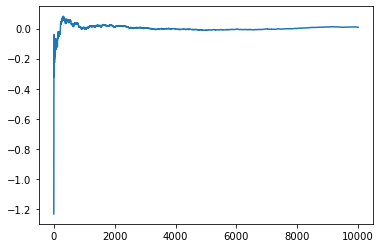

In [11]:
norm_samples = st.norm.rvs(size=10_000)

sum_ = 0
norm_sample_means = []

for k in range(10_000):
    sum_ += norm_samples[k]
    norm_sample_means.append(sum_/(k+1))
    
print(norm_sample_means[995:1000])
print(norm_sample_means[9995:10000])
print(len(norm_sample_means))

fig, ax = plt.subplots()

ax.plot(norm_sample_means);

Now Cauchy:

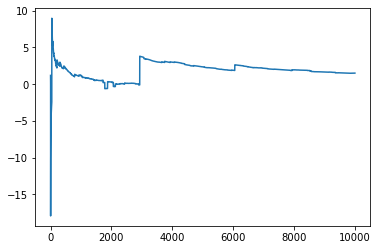

In [12]:
norm_samples = st.cauchy.rvs(size=10_000)
sum_ = 0
norm_sample_means = []

for k in range(10_000):
    sum_ += norm_samples[k]
    norm_sample_means.append(sum_/(k+1))
    
fig, ax = plt.subplots()

ax.plot(norm_sample_means);

In the case of Cauchy the graph looks completely different every time and it does not converge, unlike for the normal distribution. This is because the Cauchy distribution has no mean.

The two solutions above are "from scratch" but there are specialized functions in numpy and pandas to compute cummulative averages, which I compare in the following:

In [13]:
norm_samples = st.norm.rvs(size=10_000)
pd_norm_samples = pd.Series(norm_samples)

In [14]:
%%time

norm_sample_means = np.cumsum(norm_samples) / np.arange(1,10_001)

print(norm_sample_means[995:1000])
print(norm_sample_means[9995:10000])
print(len(norm_sample_means))

[0.05990793 0.05951189 0.05832386 0.05809553 0.0585126 ]
[0.01469199 0.01466343 0.01471638 0.01468406 0.01466508]
10000
CPU times: user 1.11 ms, sys: 692 µs, total: 1.81 ms
Wall time: 1.37 ms


In [15]:
%%time

norm_sample_means = pd_norm_samples.expanding().mean()

print(norm_sample_means[995:1000])
print(norm_sample_means[9995:10000])
print(len(norm_sample_means))

995    0.059908
996    0.059512
997    0.058324
998    0.058096
999    0.058513
dtype: float64
9995    0.014692
9996    0.014663
9997    0.014716
9998    0.014684
9999    0.014665
dtype: float64
10000
CPU times: user 2.05 ms, sys: 595 µs, total: 2.64 ms
Wall time: 2.15 ms


**Conclusion:** Using `np.cumsum()` is by far the fastest. Using the pandas `df.expanding()` method is slightly slower than the simple Python for loop, at least with arrays of this size.

**Problem 11 (Simulating the stock market)** Let $Y_1,Y_2,\dots$ be independent random variables such that $P(Y_i=1)=P(Y_i=-1)=1/2$. Let $X_n=\sum_{i=1}^nY_i$. Simulate $X_n$ and plot $X_n$ versus $n$ for $n=1,2,\dots,10,000$. Repeat the whole simulation several times. Notice two things. First, it's easy to "see" patterns in the sequence even though it is random. Second, you will find that the four runs look very different even though they were generated the same way. How is this explained in terms of $\mathbb{E}(X)$ and $\mathbb{V}(X)$?

(This is just a random walk of course)

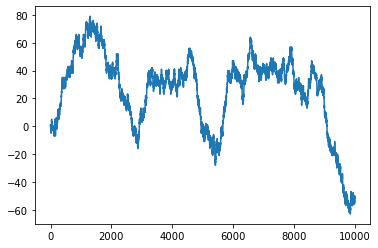

In [16]:
steps = [1,-1]
walk = [0]

for k in range(1,10_000):
    walk.append(walk[-1] + random.choice(steps))

plt.plot(walk);

Intuitively, the runs look very different every time for the following reasons. The variance $\mathbb{V}(X)$ equals the number of steps, which means that we expect the values to be further and further away from the mean $\mathbb{E}(X)=0$ with every step. On the other hand, if we do many simulations and take the (sample) mean at a particular point, then we should get something close to $\mathbb{E}(X)=0$. Putting those two facts together we see that repeated simulations need to be going in "different directions" to cancel each other out, since they individually are expected to end up far away from 0 after many steps but an average of many random walks needs to stay close to 0 at all times.

**Problem 19** This question if to help you understand the idea of a **sampling distribution**. Let $X_1,\ldots,X_n$ be IID with mean $\mu$ and variance $\sigma^2$. Let $\bar X_n = \frac 1n \sum_{i=1}^n X_i$. Then $\bar X_n$ is a **statistic**, that is, a function of the data. Since $\bar X_n$ is a random variable, it has a distribution. This distribution is called the *sampling distribution of the statistic*. Recall from Theorem 3.17 that $\mathbb{E}(\bar X_n)=\mu$ and $\mathbb{V}(\bar X_n)=\sigma^2/n$. Don't confuse the distribution of the data $f_X$ with the distribution of the statistic $f_{\bar X_n}$. To make this clear, let $X_1,\dots,X_n \sim\text{Uniform}(0,1)$. Let $f_X$ be the density of $\text{Uniform}(0,1)$. Plot $f_X$. Now let $\bar X_n = \frac1n \sum_{i=1}^n X_i$. Find $\mathbb{E}(\bar X_n)$ and $\mathbb{V}(\bar X_n)$. Plot them as a function of $n$ and interpret. Now simulate the distribution of $\bar X_n$ for $n=1,5,25,100$. Check that the simulated values of $\mathbb{E}(\bar X_n)$ and $\mathbb{V}(\bar X_n)$ agree with your theoretical calculations. What do you notice about the sampling distribution of $\bar X_n$ as $n$ increases?

In [17]:
def uniform_sampler(N):
    '''Creates a size N sample of Uniform(0,1) and returns the sample mean'''
    samples = st.uniform.rvs(size=N)
    return samples.mean()

means = {}
sample_exps = {}
sample_vars = {}

for N in [1, 5, 25, 100]:
    means[N] = np.fromiter((uniform_sampler(N) for n in range(10000)), float, count = 10000)
    sample_exps[N] = means[N].mean()
    sample_vars[N] = st.tvar(means[N]) # "trimmed variance" is corrected by n/(n-1), to get the sample variance

N = 1, simulated expectation = 0.5050793526951453, simulated variance = 0.08318186592267969
N = 1, exact expectation = 0.5, exact variance = 0.08333333333333333
N = 5, simulated expectation = 0.4987594737661955, simulated variance = 0.01649177143569849
N = 5, exact expectation = 0.5, exact variance = 0.016666666666666666
N = 25, simulated expectation = 0.5008506209450535, simulated variance = 0.0033493772434958083
N = 25, exact expectation = 0.5, exact variance = 0.003333333333333333
N = 100, simulated expectation = 0.49982938667553234, simulated variance = 0.0008327351558048702
N = 100, exact expectation = 0.5, exact variance = 0.0008333333333333333


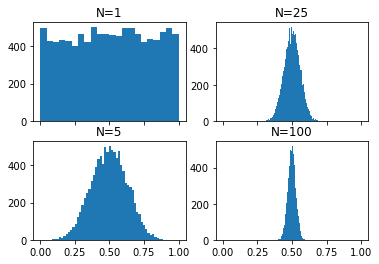

In [18]:
fig, axs = plt.subplots(2,2, sharex=True)

axs[0,0].hist(means[1], bins = 'auto')
axs[0,0].set_title('N=1')
axs[1,0].hist(means[5], bins = 'auto')
axs[1,0].set_title('N=5')
axs[0,1].hist(means[25], bins = 'auto')
axs[0,1].set_title('N=25')
axs[1,1].hist(means[100], bins = 'auto')
axs[1,1].set_title('N=100')

for N in [1, 5, 25, 100]:
    print(f'N = {N}, simulated expectation = {sample_exps[N]}, simulated variance = {sample_vars[N]}')
    print(f'N = {N}, exact expectation = 0.5, exact variance = {1/12/N}')